# Laboratory 4 - Introduction to Numerical Methods for Data Science

## Week 4 - Numerical Integration

The goal of this laboratory is get familiar with the numerical integration.

You will learn about:

- Numerical integration using interval techniques such as Trapezoidal or Simpson's Rule
- Numerical integration for callables using Gaussian Quadratures
- Cumulative sum to show indefinite integrals

After completing the laboratory you will see that numerical integration is significantly easier and more accurate compared to numerical differentiation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch as tc
from scipy import integrate
from scipy import special
import time

from typing import Callable

### Task 1 - Numerical Integration - Trapezoidal

Implement function called `trapezoidal` that performs the numerical integration using the Trapezoidal Rule of the input `np.ndarray` and a given `step` parameter. Do not use built-in functions for numerical integration.

In [ ]:
def trapezoidal(array : np.ndarray, step : float):
    sum = 0
    for i in range(0, len(array) - 1):
        sum += (array[i] + array[i + 1]) / 2
    return sum * step

In [ ]:
start = -3
stop = 3
step = 0.001

x = np.linspace(start, stop, int((stop - start) / step))
f = x**2
"""
Analytical solution: x**3 /3 -> 3**3 / 3 - (-3)**3 / 3 = 18
"""
print(f"Real solution: {stop**3/3 - start**3/3}")
print(f"Solution: Your Implementation: {trapezoidal(f, step)}")
print(f"Solution: SciPy: {integrate.trapezoid(f, dx=step)}")

Real solution: 18.0
Solution: Your Implementation: 17.997001000166698
Solution: SciPy: 17.997001000166698


Test your implementation:

In [ ]:
start = -3
stop = 3
step = 0.001

x = np.linspace(start, stop, int((stop - start) / step))
f = x**2
"""
Analytical solution: x**3 /3 -> 3**3 / 3 - (-3)**3 / 3 = 18
"""
print(f"Real solution: {stop**3/3 - start**3/3}")
print(f"Solution: Your Implementation: {trapezoidal(f, step)}")
print(f"Solution: SciPy: {integrate.trapezoid(f, dx=step)}")

Real solution: 18.0
Solution: Your Implementation: 17.99700100016671
Solution: SciPy: 17.997001000166698


### Task 2 - Numerical Integration - Simpson's

Implement function called `simpson` that performs the numerical integration using the Simpson's Rule of the input `np.ndarray` and a given `step` parameter. Do not use built-in functions for numerical integration. The function should raise an error if the number of elements in `array` is not odd.

In [ ]:
def simpson(array: np.ndarray, step: float):

    for i in range(1, len(array) - 1):
        sum = array[0] + array[-1]
        if i%2 == 0:
          sum += 2 * array[i]
        else:
          sum += 4 * array[i]
    return sum * (step / 3)

In [ ]:
start = 1
stop = 4
num_elements = 999
step = (stop - start) / num_elements

x = np.arange(start, stop, step)
f = 1 / x
"""
Analytical solution: log(4) - log(1) = log(4)
"""
print(f"Real solution: {np.log(4) - np.log(1)}")
print(f"Solution: Your Implementation: {simpson(f, step)}")
print(f"Solution: SciPy: {integrate.simpson(f, dx=step)}")

"""
Note - this is another way to calculate the value of log(x) instead of using the Taylor's series expansion.
"""

Real solution: 1.3862943611198906
Solution: Your Implementation: 1.385543328417358
Solution: SciPy: 1.3855433284173586


"\nNote - this is another way to calculate the value of log(x) instead of using the Taylor's series expansion.\n"

Test your implementation:

In [ ]:
start = 1
stop = 4
num_elements = 999
step = (stop - start) / num_elements

x = np.arange(start, stop, step)
f = 1 / x
"""
Analytical solution: log(4) - log(1) = log(4)
"""
print(f"Real solution: {np.log(4) - np.log(1)}")
print(f"Solution: Your Implementation: {simpson(f, step)}")
print(f"Solution: SciPy: {integrate.simpson(f, dx=step)}")

"""
Note - this is another way to calculate the value of log(x) instead of using the Taylor's series expansion.
"""

Real solution: 1.3862943611198906
Solution: Your Implementation: 1.3855433284173595
Solution: SciPy: 1.3855433284173586


"\nNote - this is another way to calculate the value of log(x) instead of using the Taylor's series expansion.\n"

### Task 3 - Cumulative Sum

Implement your own implemention of the `np.cumsum` function - so a function that returns a cumulative sum of the input `array`. Do not use built-in `np.cumsum` functions or its variants.

In [ ]:
def cumsum(array : np.ndarray):
    array_of_sums = np.zeros(len(array))
    for i in range(0, len(array)):
        sum = 0
        for j in range(0, i + 1):
            sum += array[j]
        array_of_sums[i] = sum
    return array_of_sums

In [ ]:
array = np.arange(0, 100)

mse = lambda a, b: np.mean((a - b)**2)

print(f"MSE between implementations: {mse(cumsum(array), np.cumsum(array))}")

MSE between implementations: 0.0


Test your implementation:

In [ ]:
array = np.arange(0, 100)

mse = lambda a, b: np.mean((a - b)**2)

print(f"MSE between implementations: {mse(cumsum(array), np.cumsum(array))}")

MSE between implementations: 0.0


### Task 4 - Cumulative Sum vs Trapezoidal / Simpson's Rule

Now use your implementation of cumulative sum from Task 3 to compare it's behavior to the Trapezoidal and Simpson's Rule.

Analytically calculate the definite integral of $f(x) = x^3 + x^2 + x + 1$ from $x=1$ to $x=3$.
Then generate an interval of 999 values between 1 and 3 and calculate the integral using the three methods: last value of cumulative sum, Trapeozidal rule and Simpson's rule.

Calculate the percentage relative error with respect to the true integral value.

In [ ]:
def_int = lambda x: x**4/4 + x**3/3 + x**2/2 + x
func_int = def_int(3) - def_int(1)

print(f"Real value: {func_int} \n")
x = np.linspace(1, 3, num=999)

f = lambda x: x**3 + x**2 + x + 1
f_values = f(x)
step = x[1] - x[0]

cumsum_value = cumsum(f_values)[-1] * (x[1] - x[0])

trapezoidal_value = trapezoidal(f_values, x[1] - x[0])

simpson_value = simpson(f_values, x[1] - x[0])

print(f"Cumsum value: {cumsum_value}")
print(f"Trapezoidal value: {trapezoidal_value}")
print(f"Simpson's value: {simpson_value}")

print(f"Cumsum percentage relative error: {np.abs((cumsum_value - func_int)/func_int)*100}")
print(f"Trapezoidal percentage relative error: {np.abs((trapezoidal_value - func_int)/func_int)*100}")
print(f"Simpson's percentage relative error: {np.abs((simpson_value - func_int)/func_int)*100}")


Real value: 34.666666666666664 

Cumsum value: 34.71076421379646
Trapezoidal value: 34.66667603744377
Simpson's value: 34.66666666666484
Cumsum percentage relative error: 0.12720446287440762

Trapezoidal percentage relative error: 2.703108780912964e-05

Simpson's percentage relative error: 5.267581242990743e-12


Real value: 34.666666666666664
Cumsum value: 34.67601870407482
Trapezoirdal value: 34.63197466003077
Simpson value: 34.631965298632004
Cumsum percentage relative error: 0.026977030985066472
Trapezoidal percentage relative error: 0.10007309606507694
Simpson percentage relative error: 0.10010010009998255


Note that a simple summation is enough to approximate the integral value.

### Task 5 - Cumulative Sum to show Indefinite Integrals

Again use your implementation of `cumsum` from Task 3, but this time to show an indefinite integral.

Generate a function $f(x) = sin(x)$ from $-\pi$ to $\pi$ with 100 values. Then calculate the cumulative sum of the generated array and show both arrays on the same plot.

Note that the cumulative sum shows you $g(x) = -cos(x)$ which is the antiderivative of $f(x)$.

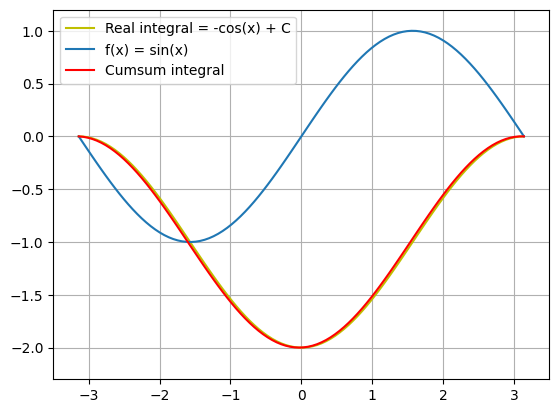

In [ ]:
x = np.linspace(-np.pi, np.pi, 100)
f = np.sin(x)
f_int = (-np.cos(x)-1)

plt.plot(x, f_int, c='y', label="Real integral = -cos(x) + C")
plt.plot(x, f, label='f(x) = sin(x)')
plt.grid(True)
plt.xlim(-3.5, 3.5)
plt.ylim(-2.3, 1.2)

plt.plot(x, cumsum(f)*(x[1] - x[0]), c='r', label="Cumsum integral")
plt.legend(loc="upper left")
plt.show()

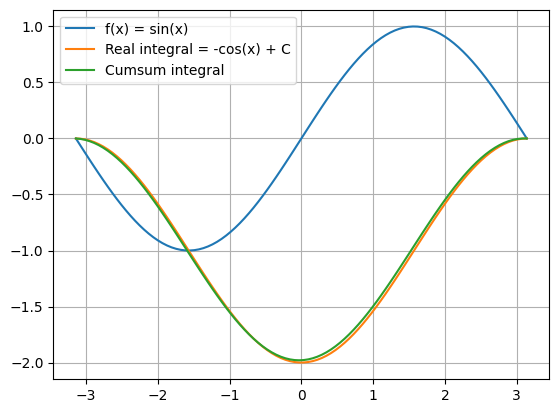

In [ ]:
pass # TODO

### Task 6 - Errors of Numerical Integration

Let's estimate the error of numerical integration using the Trapezoidal rule. Use the function that you implemented in Task 1 to show on a plot the relative percentage error for the integral of function $f(x) = x^3$ between 1 and 3 for number of samples linearly varying from 10 to 10000. Set the x-axis to log scale. You should note that the higher the number of samples, the lower the error.

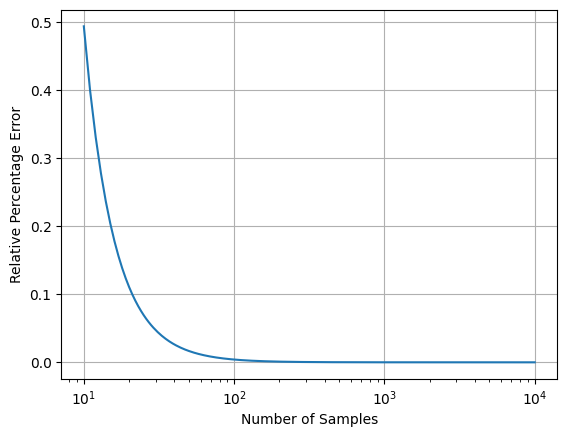

In [ ]:
f = lambda x: x**3
x = np.linspace(1, 3, 10000)
f_values = f(x)
exact_integral = 20
errors = []

step = x[1] - x[0]
for i in range(10,10000):
  x = np.linspace(1, 3, i)
  f_values = f(x)
  step = x[1] - x[0]
  errors.append(np.abs((trapezoidal(f_values, step) - exact_integral)/exact_integral)*100)

plt.plot(range(10, 10000), errors)
plt.xscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('Relative Percentage Error')
plt.grid(True)
plt.show()

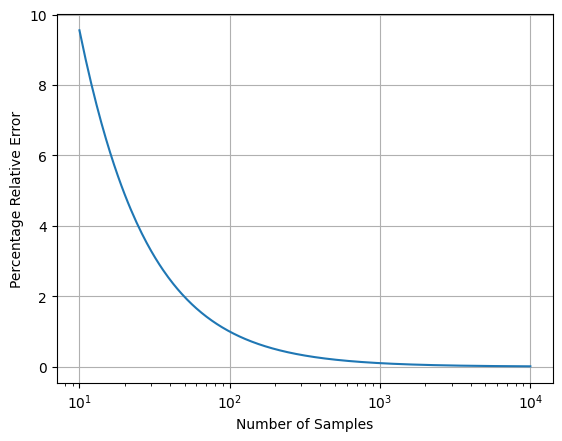

In [ ]:
pass # TODO


### Task 7 - Gaussian Quadratures

a) Use the Gaussian Quadratures available in the scipy.integrate library to integrate the function $f(x) = sin(x) + x^2$ from $x = -\pi$ to $x = \pi$.

Calculate also the value for the real integral.

Compare the results in terms of the relative percentage error and the exection time to the trapezoidal integration using 1000000 samples in the interval.

In [ ]:
f = lambda x: np.sin(x) + x**2
x = np.linspace(-np.pi, np.pi, 1000000)
f_values = f(x)
step = (2*np.pi)/1000000

y_integral_real = -np.cos(np.pi) + np.pi**3/3 - (-np.cos(-np.pi) - np.pi**3/3)
print(y_integral_real)

t_start = time.time()
y_integral_gauss = integrate.quad(lambda x: np.sin(x) + x**2, -np.pi, np.pi)
t_end = time.time() - t_start
print(f"Time for Gaussian: {t_end}")

t_start = time.time()
y_integral_trapezoidal = trapezoidal(f_values, step)
t_end = time.time() - t_start
print(f"Time for Trapezoidal: {t_end}")


result_trapezoidal = trapezoidal(f_values, step)
print(f"Trapezoidal integral: {result_trapezoidal}")
print(f"Gaussian Quadrature Integral: {y_integral_gauss[0]}")
print(f"Trapzeoidal Integral Relative Percentage Error: {np.abs((result_trapezoidal - y_integral_real)/y_integral_real)*100}")
print(f"Gaussian Quadrature Integral Relative Percentage Error: {np.abs((y_integral_gauss[0] - y_integral_real)/y_integral_real)*100}")

20.670851120199877
Time for Gaussian: 0.000209808349609375
Time for Trapezoidal: 0.0009675025939941406
Trapezoidal integral: 20.670830449390106
Gaussian Quadrature Integral: 20.670851120199877
Trapzeoidal Integral Relative Percentage Error: 9.999979996574579e-05
Gaussian Quadrature Integral Relative Percentage Error: 0.0


In [ ]:
pass # TODO

Time for Trapezoidal: 0.008976221084594727 seconds.
Time for Gaussian Quadrature: 0.0 seconds.
Real Integral: 20.670851120199877
Trapezoidal Integral: 20.670830449390092
Gaussian Quadrature Integral: 20.670851120199877
Trapezoidal Integral Relative Percantage Error: 9.999980003449405e-05
Gaussian Quadrature Integral Relative Percantage Error: 0.0



Note that the Guaussian Quadratures are significantly faster and more accurate. They are the desired way to integrate functions that can be represented explicitly as Callables.

b) Now repeat the process for function $f(x) = e^{x^2}$ from $x = 2$ to $x = 3$. Do not calculate the real integral. Just compare the results to each other and the execution time. Do you think the integral is accurate? What is the potential problem?

In [ ]:
f = lambda x: np.exp(x**2)
x = np.linspace(2, 3, 1000000)
f_values = f(x)
step = (3-2)/1000000

t_start = time.time()
result_trapezoidal = trapezoidal(f_values, step)
t_end = time.time() - t_start
print(f"Time for Trapezoidal: {t_end}")

t_start = time.time()
y_integral_gauss = integrate.quad(lambda x: np.exp(x**2), 2, 3)
t_end = time.time() - t_start
print(f"Time for Gaussian Quadrature: {t_end}")

print(f"Trapezoidal integral: {result_trapezoidal}")
print(f"Gaussian Quadrature Integral: {y_integral_gauss[0]}")
# gaussian might be more precise, because trapezoidal loses accuracy when it comes to "steeper" functions

Time for Trapezoidal: 0.0012714862823486328
Time for Gaussian Quadrature: 0.0003275871276855469
Trapezoidal integral: 1428.0910670387448
Gaussian Quadrature Integral: 1428.0924951272066


In [ ]:
pass # TODO

Time for Trapezoidal: 0.019985198974609375 seconds.
Time for Gaussian Quadrature: 0.0 seconds.
Trapezoidal Integral: 1428.0910670387443
Gaussian Quadrature Integral: 1428.0924951272066
